# Project: Students exam performance analysis by anova 

## Objective : Determine if there are significant differences in exam performance between different groups of students (e.g., based on gender, parent education,lunch,, ethnicity, test preparation course, etc.) using ANOVA.

**Students Performance in Exams**

**Introduction**: This dataset consists of student test score data for subjects including math, reading, and writing. The goal of this analysis is to determine correlation between the catergorical variables('gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course') and the test scores in math, reading, and writing.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [24]:
#create function for summary data
df = pd.read_csv('StudentsPerformance.csv')
print("The (Row,Column) is:\n", df.shape)
print("\n")
print("Data type of each column:\n", df.dtypes)
print("\n")
print("The number of null values in each column are:\n", df.isnull().sum())
print("\n")
print("Summary of data:\n", df.describe())  
df.head()

The (Row,Column) is:
 (1000, 8)


Data type of each column:
 gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


The number of null values in each column are:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


Summary of data:
        math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000   

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


From our data summary, we can see that there are no null values indicating we are working with a clean dataset. Additionally, the scores in math, reading, and writing contain very similar averages.

In [4]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [25]:
df1=df.select_dtypes(include=object)

In [26]:
def uniquev(h):
    return(set(df[h]))

In [27]:
for i in df1.columns:
    print(uniquev(i))

{'male', 'female'}
{'group A', 'group B', 'group E', 'group C', 'group D'}
{"bachelor's degree", "associate's degree", "master's degree", 'some high school', 'some college', 'high school'}
{'free/reduced', 'standard'}
{'none', 'completed'}


In [3]:
#Create function to display distribution pairplot
def distribution(dataset, variable):
    g = sns.pairplot(data = dataset, hue = variable)
    g.fig.suptitle('Graph showing distribution between scores and {}'.format(variable), fontsize=20)
    g.fig.subplots_adjust(top=0.9)
    return g

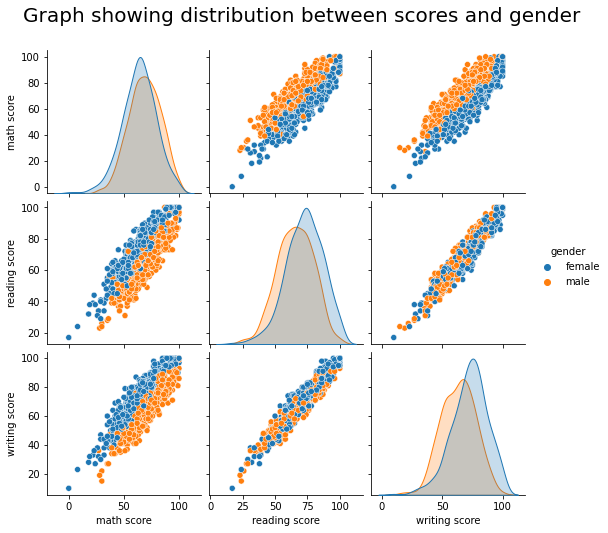

In [10]:
#Score and gender
distribution(df, 'gender')

<font color=red>Females</font> perform higher in <font color=red>reading</font> and <font color=red>writing</font> while <font color=blue>males</font> perform higher on <font color=blue>math</font>.

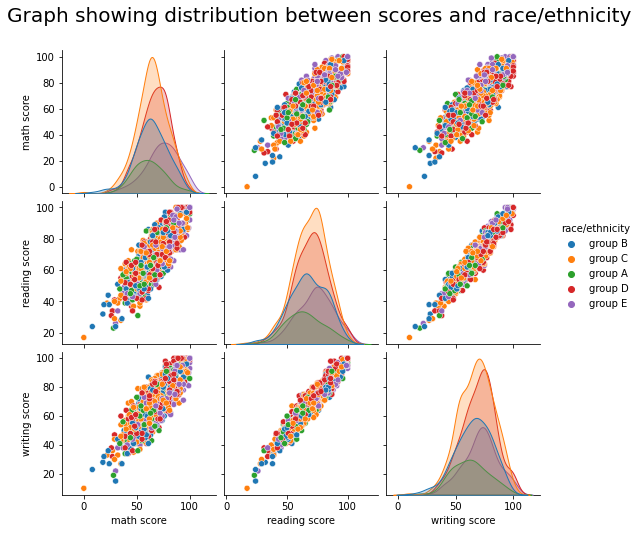

In [11]:
#score and race
distribution(df, 'race/ethnicity')

This data does tell us much because the dataset does not describe what each group is in reference to.

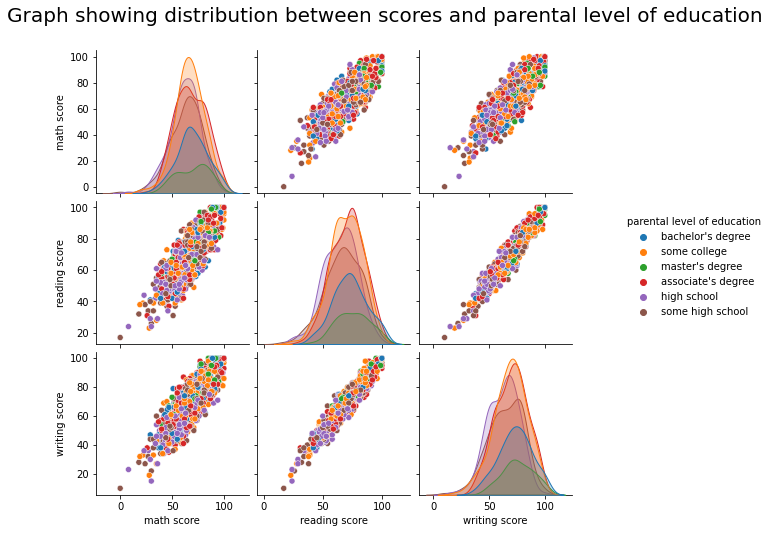

In [12]:
#score and parental education level
distribution(df, 'parental level of education')

There appears to be a trend in parental education level and student's score. The variance between the different catergorical data indicates this is not a major factor.

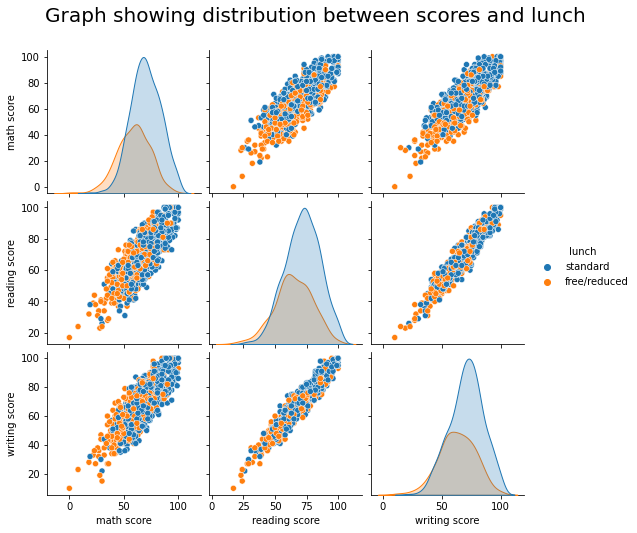

In [13]:
#Score and lunch
distribution(df, 'lunch')

Students who ate the standard lunch on average tested higher in all three subjects.

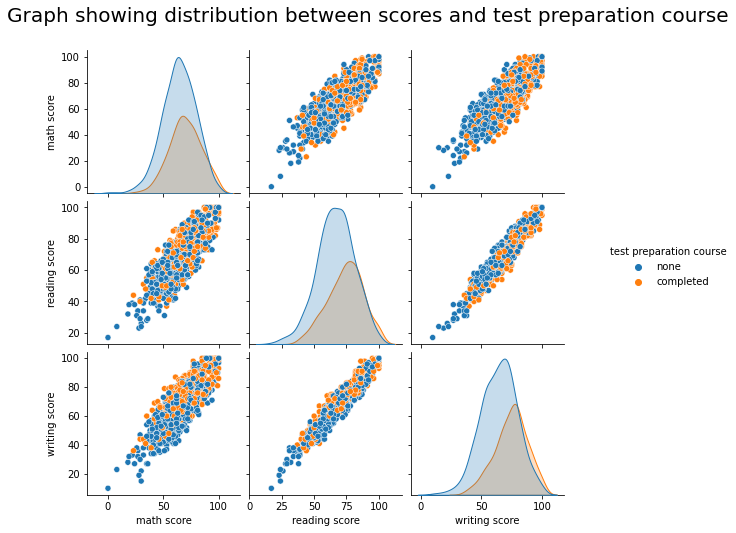

In [14]:
#Score and test preparation course
distribution(df, 'test preparation course')

Students who completed a test preparation course on average tested higher in all three subjects.

**Finding correlation between categorical variables and test scores using 1-Way ANOVA**      
1-Way ANOVA hypothesis:
1. Null hypthoesis (H0): There is no difference between groups and equality between means
2. Alternative hypothesis (H1): There is a difference between the means and groups.

1-Way Anova assumptions:
1. Normality: Each sample is taken from a normally distributed population
2. Sample independence: Each sample has been drawn independently of the other samples
3. Variance equality: The variance of data in the different groups should be the same
4. Dependent variable: Should be continuous

Hypothesis:
Using a 95% confidence internal
1. Null hypothesis is that they are independent.
2. Alternate hypothesis is that categorical data is correlated in some way.

In [15]:
#clean up column names for StatsModels
df.columns = ['gender', 'race', 'parental_edu', 'lunch', 'test_prep_course', 'math_score', 'reading_score', 'writing_score']

In [16]:
#Create anova test function
def anova_test(data, variable):
    x = ['math_score', 'reading_score', 'writing_score']
    for i,k in enumerate(x):
        lm = ols('{} ~ {}'.format(x[i],variable), data=data).fit()
        table = sm.stats.anova_lm(lm)
        print("P-value for 1-way ANOVA test between {} and {} is ".format(x[i],variable),table.loc[variable,'PR(>F)'])

In [17]:
#Gender ANOVA
anova_test(df, 'gender')

P-value for 1-way ANOVA test between math_score and gender is  9.120185549332254e-08
P-value for 1-way ANOVA test between reading_score and gender is  4.680538743935139e-15
P-value for 1-way ANOVA test between writing_score and gender is  2.0198777068686138e-22


The p-values are below 0.05 indicating we can reject the null hypothesis. This confirmation shows us there is statistical correlation between test scores and gender.

In [18]:
#Parental education ANOVA
anova_test(df, 'parental_edu')

P-value for 1-way ANOVA test between math_score and parental_edu is  5.592272384107799e-06
P-value for 1-way ANOVA test between reading_score and parental_edu is  1.1682457045707716e-08
P-value for 1-way ANOVA test between writing_score and parental_edu is  1.1202799969774331e-13


The p-values are below 0.05 indicating we can reject the null hypothesis. This confirmation shows us there is statistical correlation between test scores and parental education.

In [19]:
#Lunch ANOVA
anova_test(df, 'lunch')

P-value for 1-way ANOVA test between math_score and lunch is  2.4131955993156633e-30
P-value for 1-way ANOVA test between reading_score and lunch is  2.0027966545293393e-13
P-value for 1-way ANOVA test between writing_score and lunch is  3.186189583168996e-15


The p-values are below 0.05 indicating we can reject the null hypothesis. This confirmation shows us there is statistical correlation between test scores and what the student ate for lunch.

In [20]:
#Test Prep ANOVA
anova_test(df, 'test_prep_course')

P-value for 1-way ANOVA test between math_score and test_prep_course is  1.5359134607157186e-08
P-value for 1-way ANOVA test between reading_score and test_prep_course is  9.081783336897751e-15
P-value for 1-way ANOVA test between writing_score and test_prep_course is  3.685291735248167e-24


The p-values are below 0.05 indicating we can reject the null hypothesis. This confirmation shows us there is significance difference between means of test score of differet group.i.e test_prep_course comlete or not 

Although we saw statistical significance on parent level of education and student's scores, our pairplot showed us this difference was almost negligble. We will use a counplot below to take a further look at this data.

<AxesSubplot:xlabel='parental_edu', ylabel='count'>

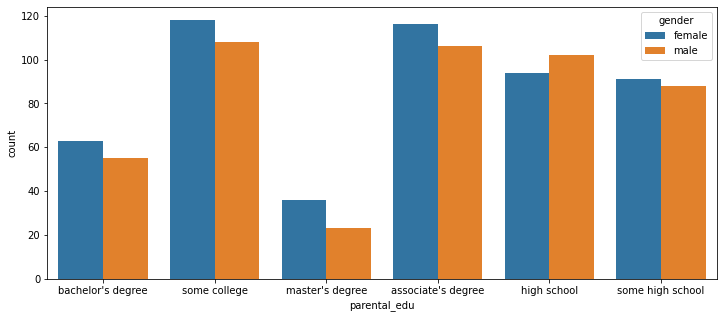

In [21]:
#Create countplot for parental education and student scores
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='parental_edu', hue='gender')

Our dataset included a very low number of parents with a master's degree or bachelor's degree. Due to the low sample size we can not confidently say that students with highly educated parents will score better.

**Summary**
Based on our analysis of student test scores we can conclude the following:
1. Females perform higher in reading and writing subjects.
2. Males perform higher in math.
3. Parental education level has a negligble difference in student's test performance.
4. Students who ate the standard lunch tested higher than those who ate a free/reduced meal.
5. Students who completed a test preparation course scored higher than those who did not.